In [117]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


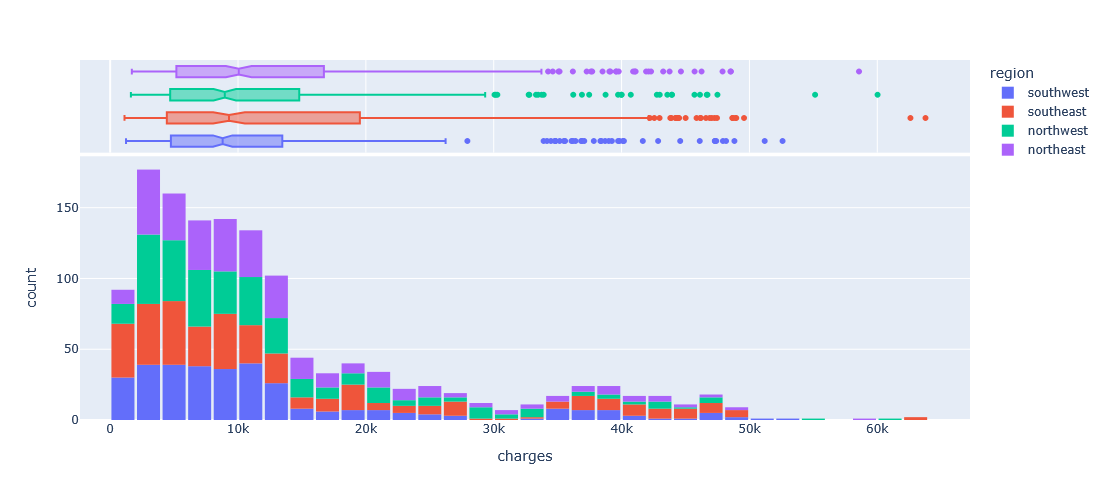

In [19]:
fig = px.histogram(df,x = "charges",marginal = "box",color = "region",nbins = 47,height = 500)
fig.update_layout(bargap = 0.1)
fig.show()

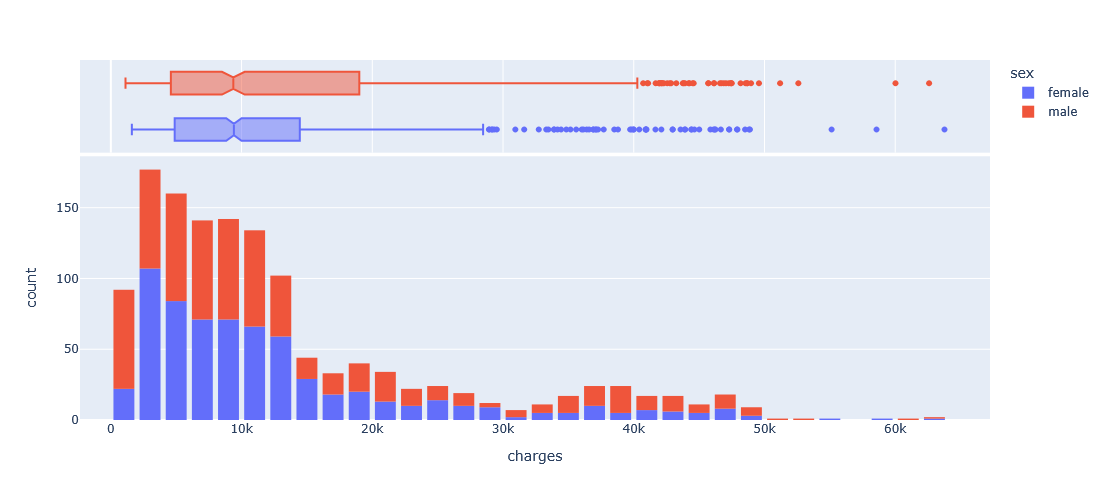

In [18]:
fig = px.histogram(df, x = "charges",marginal = "box", color = "sex",height = 500)
fig.update_layout(bargap = 0.2)
fig.show()

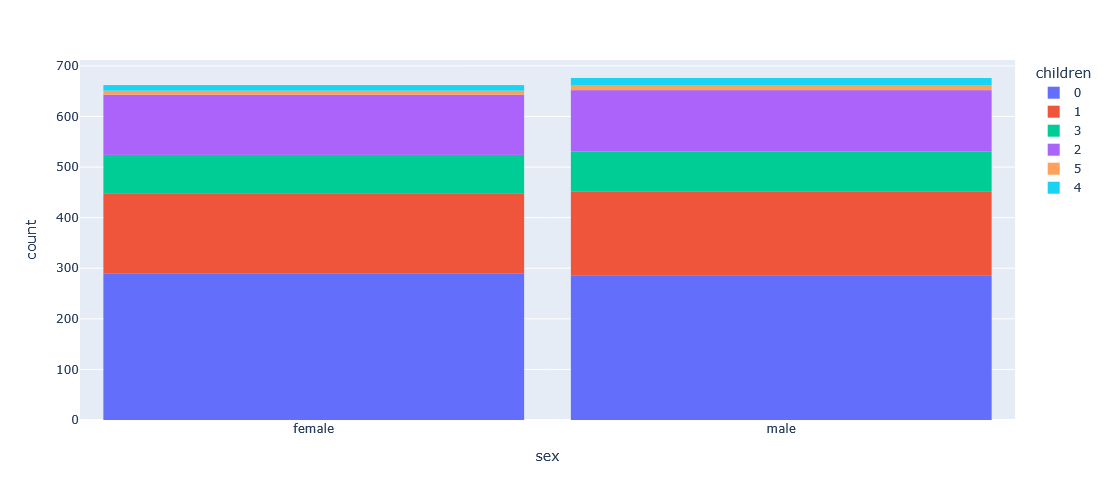

In [29]:
fig = px.histogram(df, x = "sex", color = "children",height = 500 , width = 300)
fig.update_layout(bargap = 0.1)
fig.show()

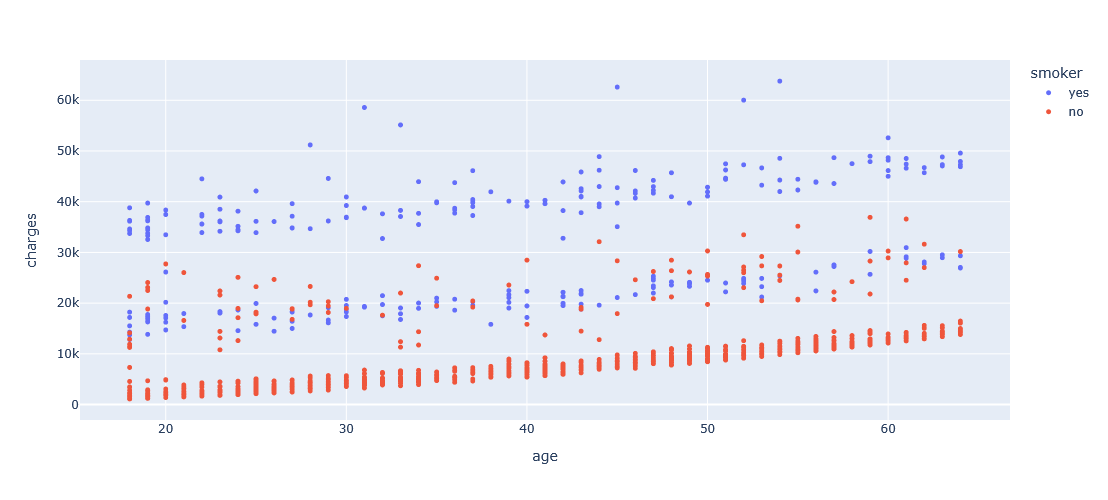

In [25]:
fig = px.scatter(df,x = 'age', y = 'charges',color = 'smoker',hover_data = ['sex'],height = 500)
fig.update_traces(marker_size = 5)
fig.show()

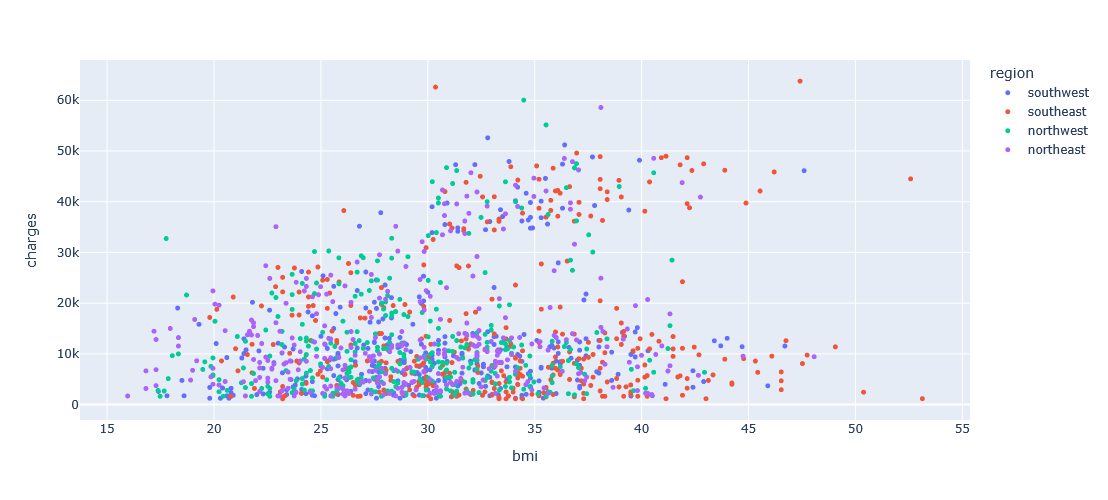

In [40]:
fig = px.scatter(df, x = 'bmi', y = 'charges', color = 'region' , hover_data = ['sex'],height = 500)
fig.update_traces(marker_size = 5)
fig.show()

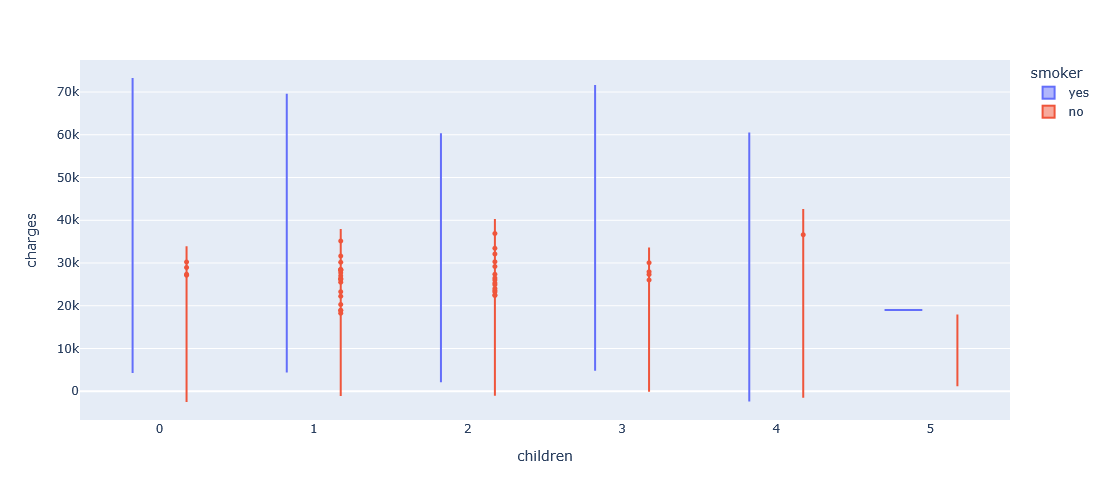

In [39]:
fig = px.violin(df, x = 'children', y = 'charges', color = 'smoker' , hover_data = ['sex'],height = 500)
fig.update_traces(marker_size = 5)
fig.show()

In [45]:
smokers_value = {"no": 0 , "yes" : 1}
smokers_value = df.smoker.map(smokers_value)

In [48]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Heat map Matrix')

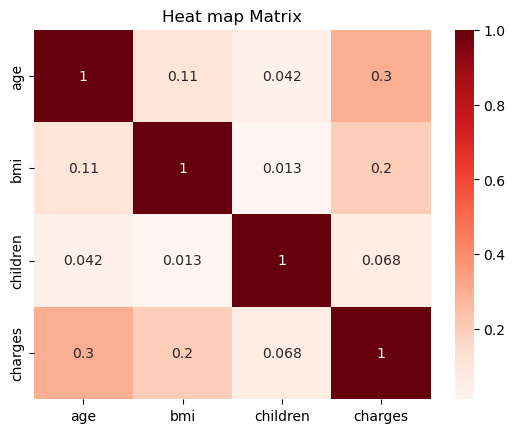

In [60]:
sns.heatmap(df.corr(numeric_only = True),cmap = "Reds" ,annot = True)
plt.title("Heat map Matrix")

In [64]:
non_smoker_df = df[df.smoker == "no"]

<Axes: xlabel='age', ylabel='charges'>

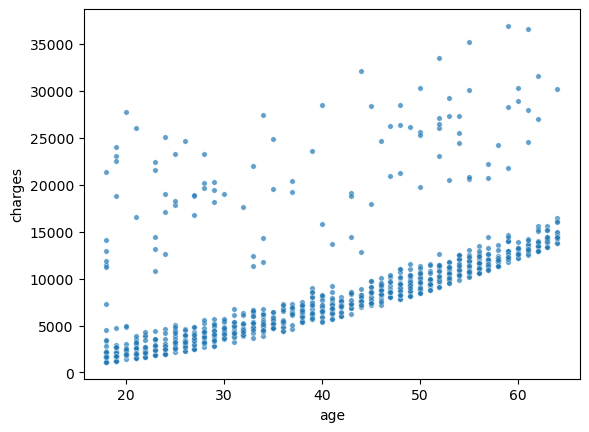

In [65]:
sns.scatterplot(data = non_smoker_df , x = "age", y = 'charges' , alpha = 0.7 ,s = 15)

In [92]:
def estimate_charges(age, w , b):
    return age* w + b

In [68]:
w = 50 
b = 100

In [70]:
age = non_smoker_df.age
estimate_charges = estimate_charges(age, w, b)

Text(0.5, 1.0, 'estimate charges vs age')

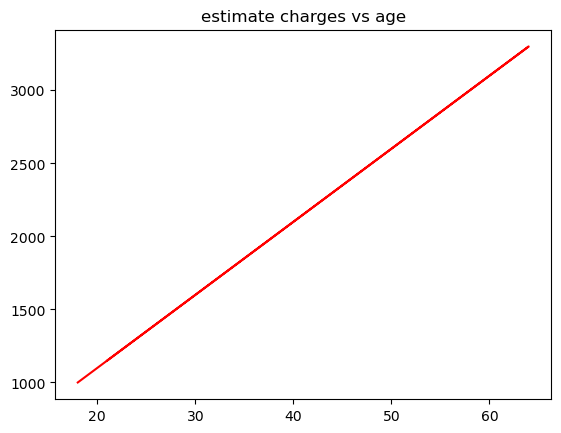

In [72]:
plt.plot(age , estimate_charges,'r')
plt.title("estimate charges vs age")

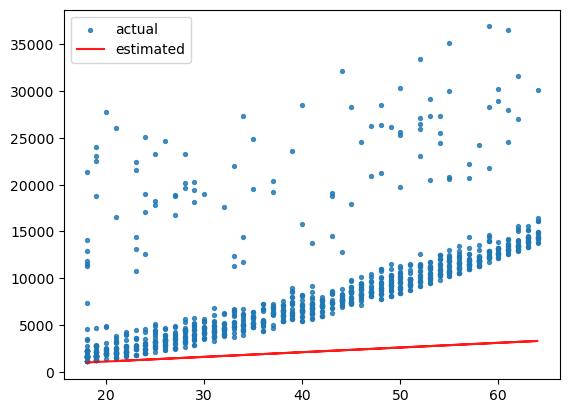

In [77]:
target = non_smoker_df.charges
plt.scatter(age, target, s=8, alpha = 0.8)

plt.plot(age, estimate_charges ,"r",alpha = 0.9)
plt.legend(["actual","estimated"])

In [96]:
def try_parameter(w,b):
    age = non_smoker_df.age
    target = non_smoker_df.charges

    estimate_charge = estimate_charges(age, w, b)
    
    plt.scatter(age, target, s=8, alpha = 0.8)
    
    plt.plot(age, estimate_charge ,"r",alpha = 0.9)
    plt.legend(["actual","estimated"])

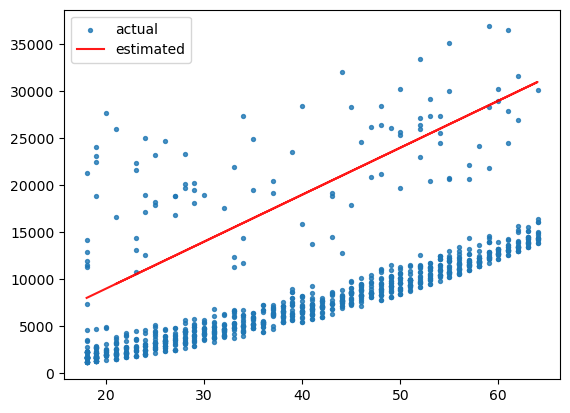

In [99]:
try_parameter(500, -1000)

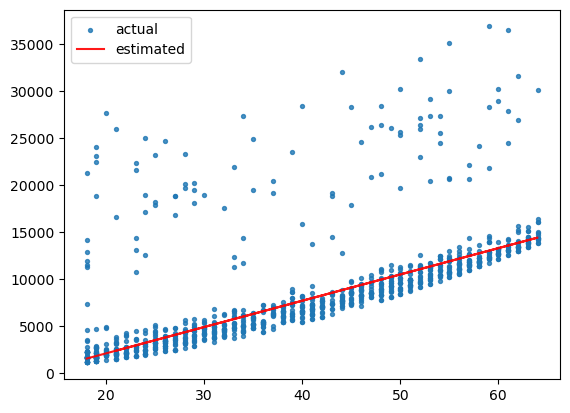

In [125]:
try_parameter(280,-3500)

In [123]:
def rems(target,predicted):
    return np.sqrt(np.mean(np.square(target-predicted)))

In [130]:
def try_parameter(w,b):
    age = non_smoker_df.age
    target = non_smoker_df.charges
    predicted = estimate_charges(non_smoker_df.age,w,b)

    estimate_charge = estimate_charges(age, w, b)
    loss = rems(target,predicted)
    print("RMSE loss:", loss)
    plt.scatter(age, target, s=8, alpha = 0.8)
    
    plt.plot(age, estimate_charge ,"r",alpha = 0.9)
    plt.legend(["actual","estimated"])

RMSE loss: 4753.176967946348


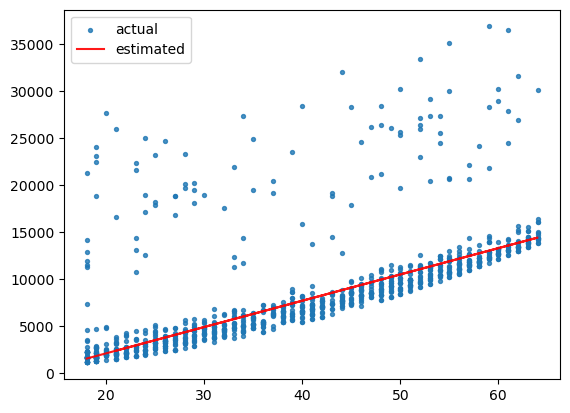

In [131]:
try_parameter(280,-3500)

In [132]:
model = LinearRegression()

In [133]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [136]:
#w
model.coef_

array([267.24891283])

In [137]:
#b
model.intercept_

np.float64(-2091.4205565650846)

RMSE loss: 4662.505766636395


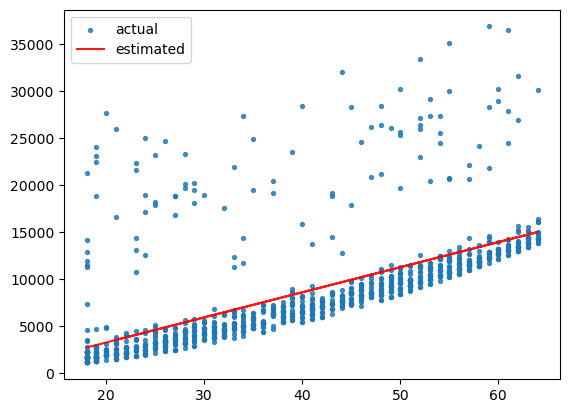

In [138]:
try_parameter(model.coef_,model.intercept_)

In [317]:
#stochastic gradient descent
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha = 0.1 , penalty = 'l1')

In [322]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges


In [429]:
model.fit(inputs,targets)

,loss,'squared_error'
,penalty,'l1'
,alpha,0.1
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


RMSE loss: 4747.189346735197


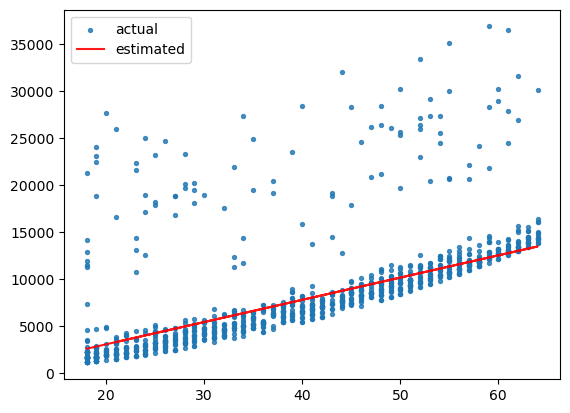

In [428]:
try_parameter(model.coef_,model.intercept_)